In [32]:
import numpy as np
import math
import random
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
from scipy import interpolate

import Packages

The goal of this notebook is to illustrate the difference in behaviour between the Heston model and the Black Scholes model. We plot the implicit volatility surface of the Black-Scholes model (taking the Heston prices as reference) to verify wether this surface shares similar features as the one obtained by taking the market prices as referrence. In particular, we should expect to observe a 'smile' in the strike variable.

First of all, we create a function to compute the implied vol for a given Heston price (taking the exact Black-Scholes formula as a reference), that is, given a Heston price $P$ and fixed rate, strike, maturity, we are looking for $\sigma$ such that $CallBs(\sigma)-CallHeston=0$

In [33]:
#Exact solution of the BS call, used for computations of the volatility surface (taking Heston prices as reference)
def CallBsExact(S0, K, T, sigma, r):
    d1=1/(sigma*np.sqrt(T))*(np.log(S0/K)+T*(r+(sigma**2/2)))
    d2=d1-sigma*np.sqrt(T)
    return S0*norm.cdf(d1)-K*norm.cdf(d2)*np.exp(-r*T)


def ImplicitVol(S0, r, model, K, T, steps, n):
    options=np.array([[Call(strike,time) for time in T] for strike in K])
    prices=MonteCarloPricer(model, options, steps, n)
    vol=np.zeros_like(options)
    for index in np.ndindex(options.shape):
        func= lambda x: CallBsExact(S0, K[index[0]], T[index[1]], x, r)-prices[index]
        vol[index]=sp.optimize.bisect(func, 0.001, 0.5)
    return vol

Next, we select a choice of parameters for our Heston model, compute the Monte-Carlo Call prices in a grid of strikes and maturity and plot the associated surface of implied volatility

We start with $\epsilon=0.1$. In this case, we notice that the implied volatility increases with $T$ but stays relatively flat in $K$.

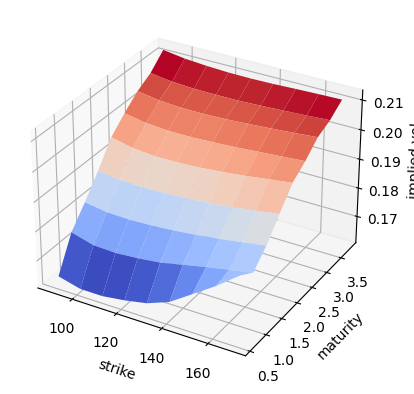

In [34]:
# Choice of parameters
    
    
n=100000
steps=1000
S0=100
r=0.03
sigma=0.235
vb=0.06
v0=0.02
kappa=0.6
epsilon=0.1
rho=-0.5

#Plotting the call prices for Heston, Black-Scholes as well as the implicit volatility surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

model= ModelClasses.HestonModel(r, kappa, v0, vb, epsilon, rho, S0)
strikes=np.array([90,100,110,120,130,140,150,160,170])
mat=np.array([0.6,1,1.4,1.8,2.2,2.6,3,3.4,3.8])
vol=ImplicitVol(S0,r,model,strikes,mat,steps,n)


Strikes, Mat = np.meshgrid(strikes, mat)


ax.plot_surface(Strikes, Mat, vol.transpose(), cmap=cm.coolwarm, antialiased=True)

ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('implied vol')

plt.show()





Increasing $\epsilon$ to $0.2$, the smile in $K$ become more prominent. This behavior makes sense, since low $\epsilon$ minimizes the 'stochastic' behaviour of the volatility, hence the Heston model gets closer to a Black-Scholes model with time-varying but deterministic volatility. The opposite is of course true when $\epsilon$ increases

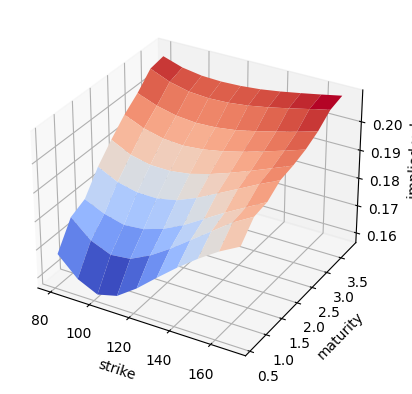

In [31]:
# Choice of parameters
    
    
n=100000
steps=1000
S0=100
r=0.03
sigma=0.235
vb=0.06
v0=0.02
kappa=0.6
epsilon=0.2
rho=-0.5

#Plotting the call prices for Heston, Black-Scholes as well as the implicit volatility surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

model= ModelClasses.HestonModel(r, kappa, v0, vb, epsilon, rho, S0)
strikes=np.array([80,90,100,110,120,130,140,150,160,170])
mat=np.array([0.6,1,1.4,1.8,2.2,2.6,3,3.4,3.8])
vol=ImplicitVol(S0,r,model,strikes,mat,steps,n)


Strikes, Mat = np.meshgrid(strikes, mat)


ax.plot_surface(Strikes, Mat, vol.transpose(), cmap=cm.coolwarm, antialiased=True)

ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('implied vol')

plt.show()



